In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Вариант 3
$y=|x|, a=-3, b=3$

<img src="images/assigment1.jpg" width="700">

### 1. Формируем выборку

$m_x=\frac{a+b}{2}=0, \sigma_x=\sqrt{\frac{(b-a)^2}{12}}=\sqrt{3}$

In [2]:
def get_x(a, b):
    return a + (b - a) * np.random.uniform()

def get_y(x):
    return np.abs(x)

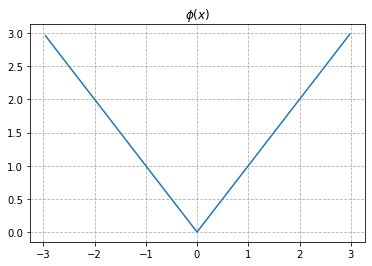

In [3]:
a, b = -3, 3
N = 250
#N = int(input())
x = sorted([get_x(a, b) for i in range(N)])
y = get_y(x)
plt.plot(x, y)
plt.title("$\phi(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 2. Вариационный ряд и эмпирическая функция распределения

In [4]:
unique, counts = np.unique(y, return_counts=True)
Y = dict(zip(unique, counts))
Y

{0.0020777459921808017: 1,
 0.0054355817457998334: 1,
 0.011961549151089379: 1,
 0.015892024341417788: 1,
 0.025366533550479353: 1,
 0.03255280451311249: 1,
 0.03694450492381751: 1,
 0.03830143638230066: 1,
 0.08263256667952668: 1,
 0.10081232879474333: 1,
 0.12653499942722313: 1,
 0.1561232341266754: 1,
 0.1600953481477716: 1,
 0.1721001420912791: 1,
 0.19589866301310543: 1,
 0.20387914618065084: 1,
 0.20450993486505142: 1,
 0.21235652875789146: 1,
 0.22980850635697747: 1,
 0.23579880280781662: 1,
 0.24836510391357347: 1,
 0.25846359712958833: 1,
 0.278146754387568: 1,
 0.2887877798143377: 1,
 0.2906331846857393: 1,
 0.29074379674818207: 1,
 0.29576497892536047: 1,
 0.314859854254093: 1,
 0.3256442512736131: 1,
 0.34941784734106296: 1,
 0.355505877868179: 1,
 0.38156130162302127: 1,
 0.4091151087284839: 1,
 0.41856278217403187: 1,
 0.42069231394845774: 1,
 0.42880964562023394: 1,
 0.45305918414490787: 1,
 0.4538946615008177: 1,
 0.45960467625994816: 1,
 0.4607523755636782: 1,
 0.46862

In [5]:
def F_y_emp(X, x0):
    count = 0
    for i in X:
        if i <= x0:
            count += 1
    return count / len(X)

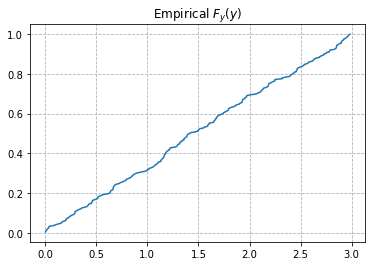

In [6]:
f_y_emp = [F_y_emp(Y, y) for y in Y.keys()]
plt.plot(list(Y.keys()), f_y_emp)
plt.title("Empirical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 3. Теоритически находим функцию распределения

<img src="images/Lab1_3.jpg" width="450">

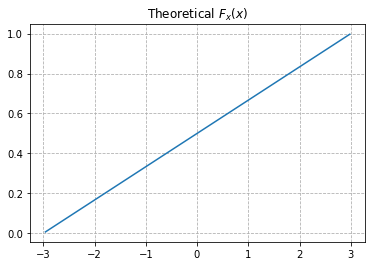

In [7]:
def F_x_ther(t):
    if t < -3:
        return 0
    elif t > 3:
        return 1
    else:
        return (t - a) / (b - a)  

plt.plot(x, [F_x_ther(x_0) for x_0 in x])
plt.title("Theoretical $F_x(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

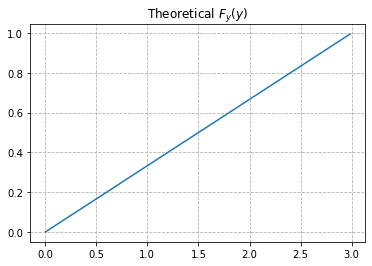

In [8]:
def F_y_ther(y):
    if y < 0:
        return 0
    else:
        return F_x_ther(y) - F_x_ther(-y)

f_y_ther = [F_y_ther(y0) for y0 in list(Y.keys())]
plt.plot(list(Y.keys()), f_y_ther)
plt.title("Theoretical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### Сравниваем теоритческую и эмпирическую

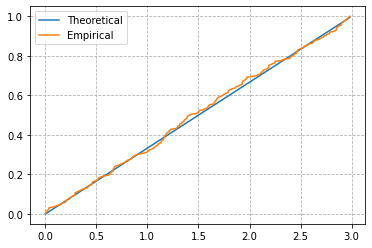

In [9]:
fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_ther, label="Theoretical")
ax.plot(list(Y.keys()), f_y_emp, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()